# Create pedestal file.

First step: create pedestal file. This should be done once. You can also call this script in command line:

`python create_fits_file_with_pedestals.py --input_file path to LST data --output_file path to pedestal file *.fits`

In [64]:
%run create_fits_file_with_pedestals.py --input_file /media/pawel1/ADATA\ HD330/20180919/Mirca-1.Run0006.000* --output_file pedestal_Mirca_Run06.fits

Input file:  ['/media/pawel1/ADATA HD330/20180919/Mirca-1.Run0006.0000.fits.fz', '/media/pawel1/ADATA HD330/20180919/Mirca-1.Run0006.0004.fits.fz', '/media/pawel1/ADATA HD330/20180919/Mirca-1.Run0006.0003.fits.fz', '/media/pawel1/ADATA HD330/20180919/Mirca-1.Run0006.0002.fits.fz']
Output file:  ['pedestal_Mirca_Run06.fits']


Processing file:  /media/pawel1/ADATA HD330/20180919/Mirca-1.Run0006.0000.fits.fz
Processing file:  /media/pawel1/ADATA HD330/20180919/Mirca-1.Run0006.0004.fits.fz
Processing file:  /media/pawel1/ADATA HD330/20180919/Mirca-1.Run0006.0003.fits.fz
Processing file:  /media/pawel1/ADATA HD330/20180919/Mirca-1.Run0006.0002.fits.fz


/home/pawel1/Pulpit/Astrophysics/CTA/low_level_calib_drs4/example/create_fits_file_with_pedestals.py:55: RuntimeWarning: divide by zero encountered in true_divide
  self.meanped = self.meanped/self.numped
/home/pawel1/Pulpit/Astrophysics/CTA/low_level_calib_drs4/example/create_fits_file_with_pedestals.py:55: RuntimeWarning: invalid value encountered in true_divide
  self.meanped = self.meanped/self.numped


In [16]:
from ctapipe.io.lsteventsource import LSTEventSource
from ctapipe.io import EventSeeker
from ctapipe.calib.camera.lst_r0 import LSTR0Corrections

In [59]:
lst_r0 = LSTR0Corrections(pedestal_path="pedestal20180919.fits")

source = LSTEventSource(input_url="/media/pawel1/ADATA HD330/20180919/Mirca-1.Run0006.0010.fits.fz",
                        max_events=300)

seeker = EventSeeker(source)
events = seeker[0:300]

for i, event in enumerate(events):
    lst_r0.subtract_pedestal(event)
    lst_r0.time_lapse_corr(event)
    lst_r0.interpolate_spikes(event)

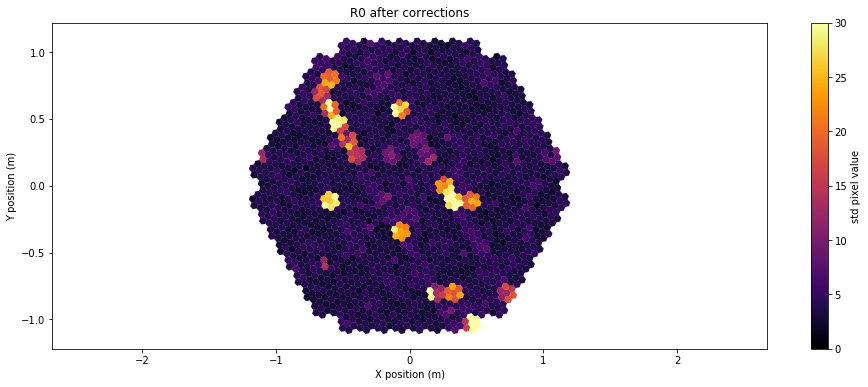

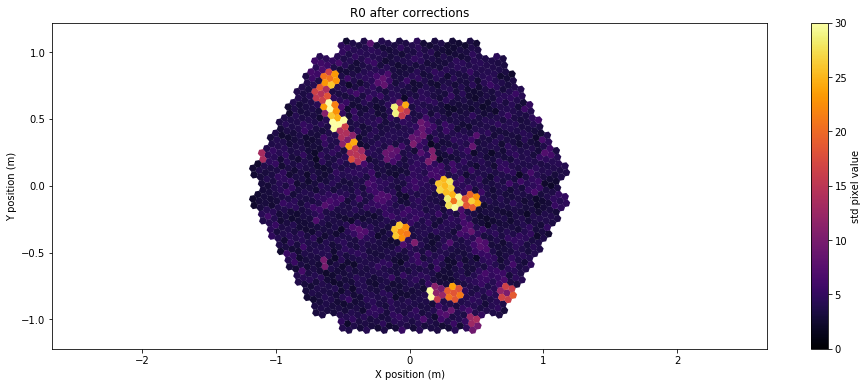

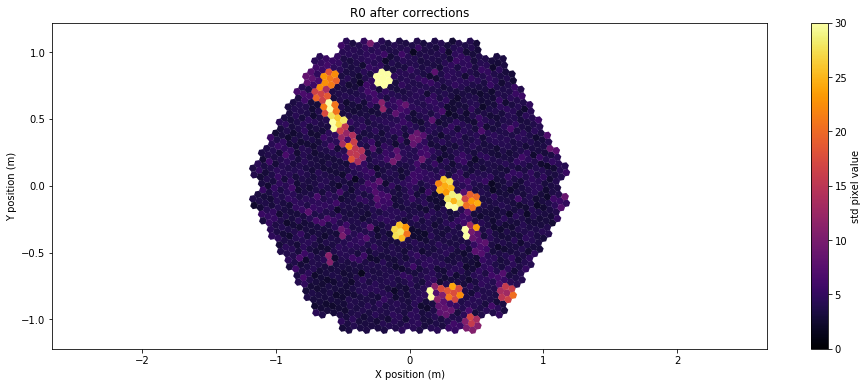

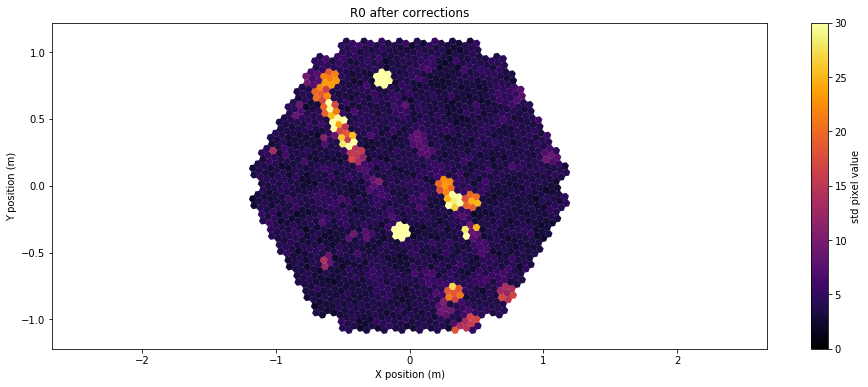

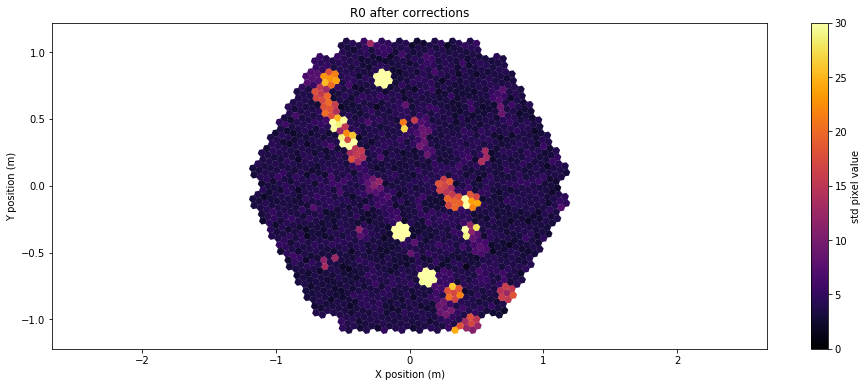

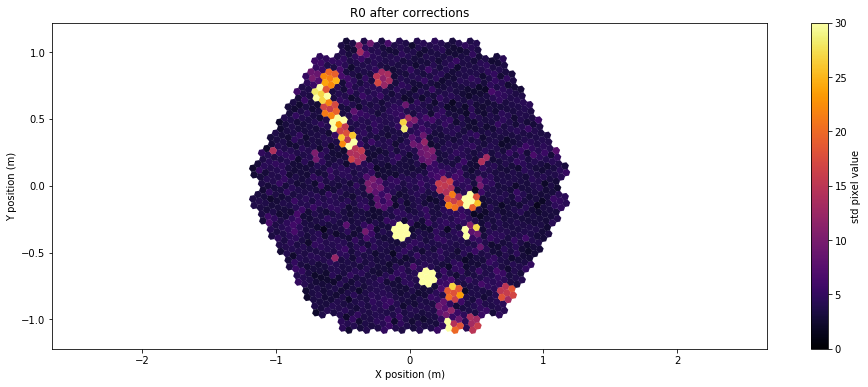

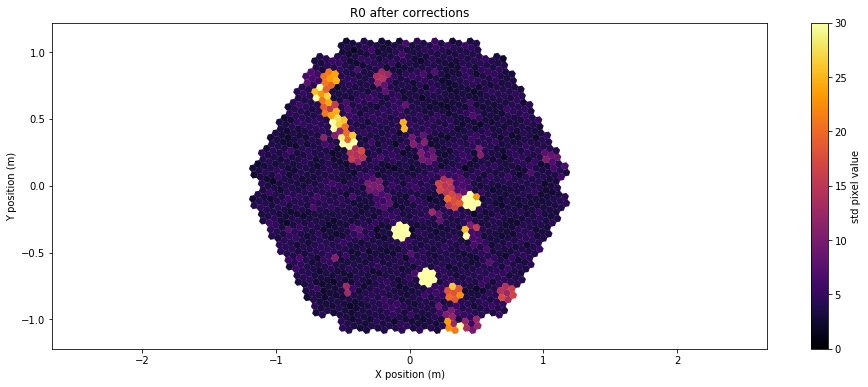

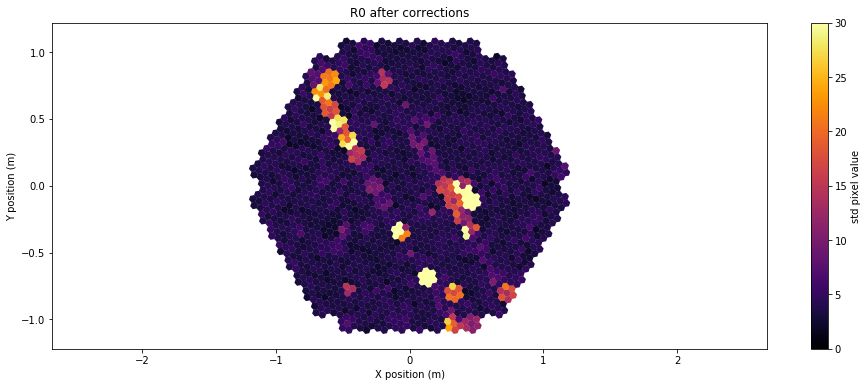

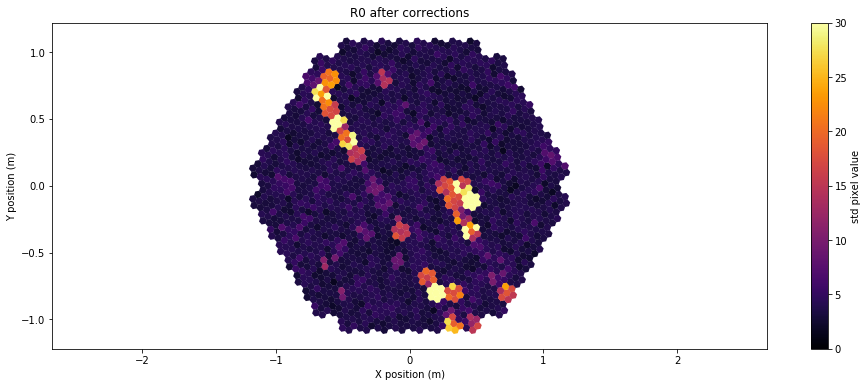

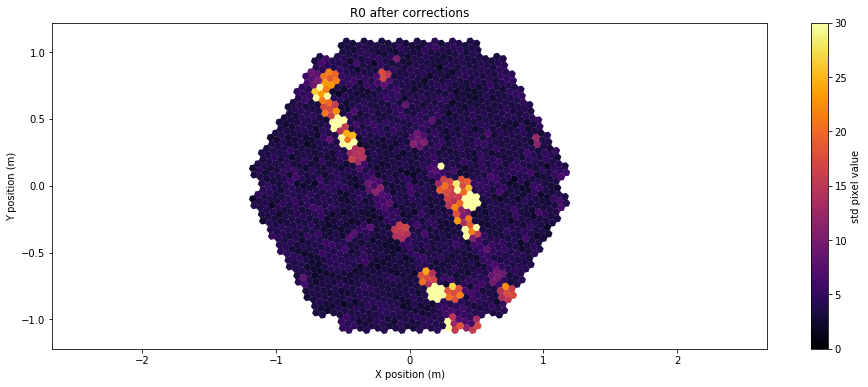

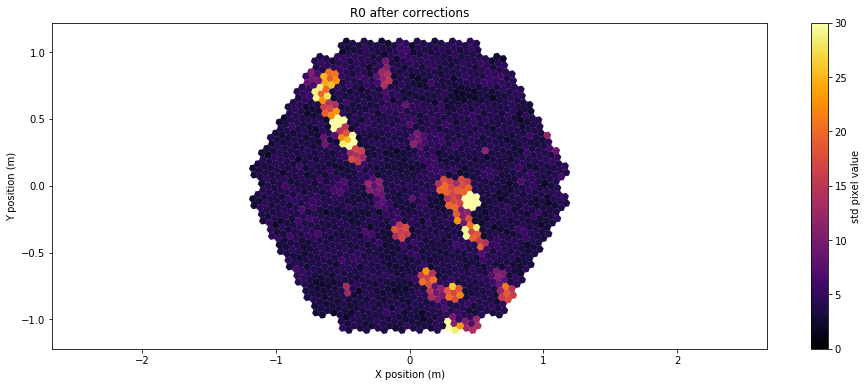

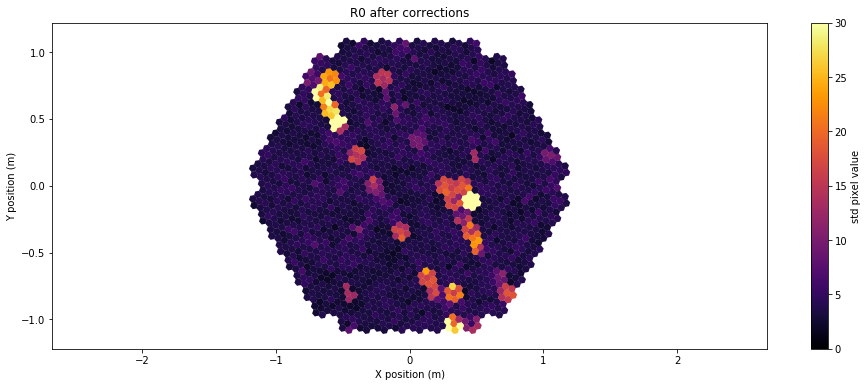

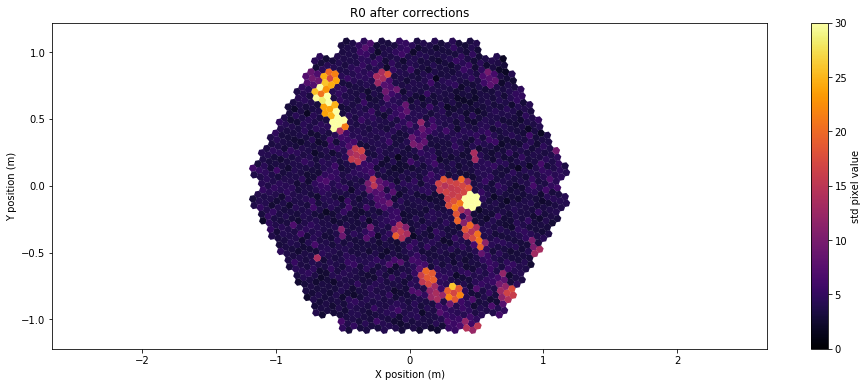

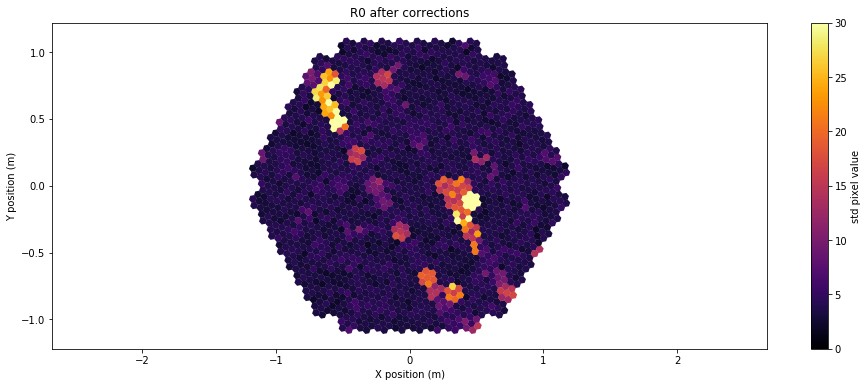

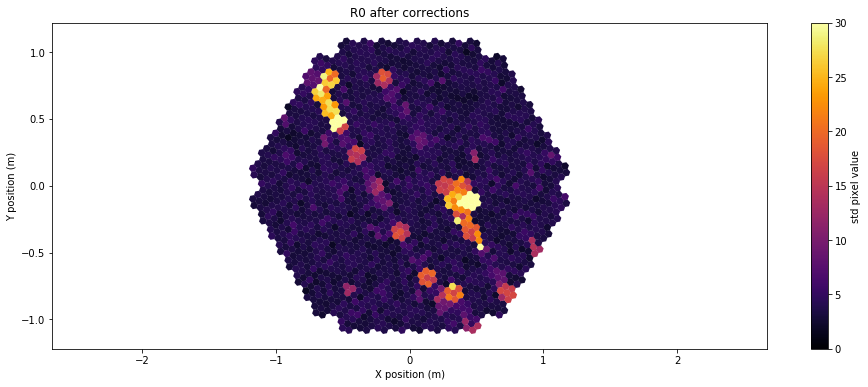

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay

for ev in events[100:115]:
    N_modules = 7*ev.lst.tel[0].svc.num_modules
    std_signal = np.zeros(1855)
    for pixel in range(0, N_modules):
        std_signal[pixel] = np.std(ev.r0.tel[0].waveform[1, pixel, 2:38])
 
    geom = CameraGeometry.from_name("LSTCam")
    fig, ax = plt.subplots(figsize=(16, 6))

    disp0 = CameraDisplay(geom, ax=ax)
    disp0.cmap = 'inferno'
    disp0.image = std_signal
    disp0.add_colorbar(ax=ax, label='std pixel value')
    disp0.set_limits_minmax(0, 30)
    ax.set_title("R0 after corrections")
    plt.show()